In [1]:
from geneformer import EmbExtractor

In [ ]:
# initiate EmbExtractor
# OF NOTE: token_dictionary_file must be set to the gc-30M token dictionary if using a 30M series model
# (otherwise the EmbExtractor will use the current default model dictionary)
embex = EmbExtractor(model_type="CellClassifier",
                     num_classes=3,
                     filter_data={"cell_type":["Cardiomyocyte1","Cardiomyocyte2","Cardiomyocyte3"]},
                     max_ncells=1000,
                     emb_layer=0,
                     emb_label=["disease","cell_type"],
                     labels_to_plot=["disease"],
                     forward_batch_size=200,
                     nproc=16,
                     token_dictionary_file="./gene_dictionaries_30m/token_dictionary_gc30M.pkl") # change from current default dictionary for 30M model series

# extracts embedding from input data
# input data is tokenized rank value encodings generated by Geneformer tokenizer (see tokenizing_scRNAseq_data.ipynb)
# example dataset for 30M model series: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/cell_classification/disease_classification/human_dcm_hcm_nf.dataset
embs = embex.extract_embs("../fine_tuned_models/gf-6L-30M-i2048_CellClassifier_cardiomyopathies_220224", # example 30M fine-tuned model
                          "path/to/input_data/",
                          "path/to/output_directory/",
                          "output_prefix")


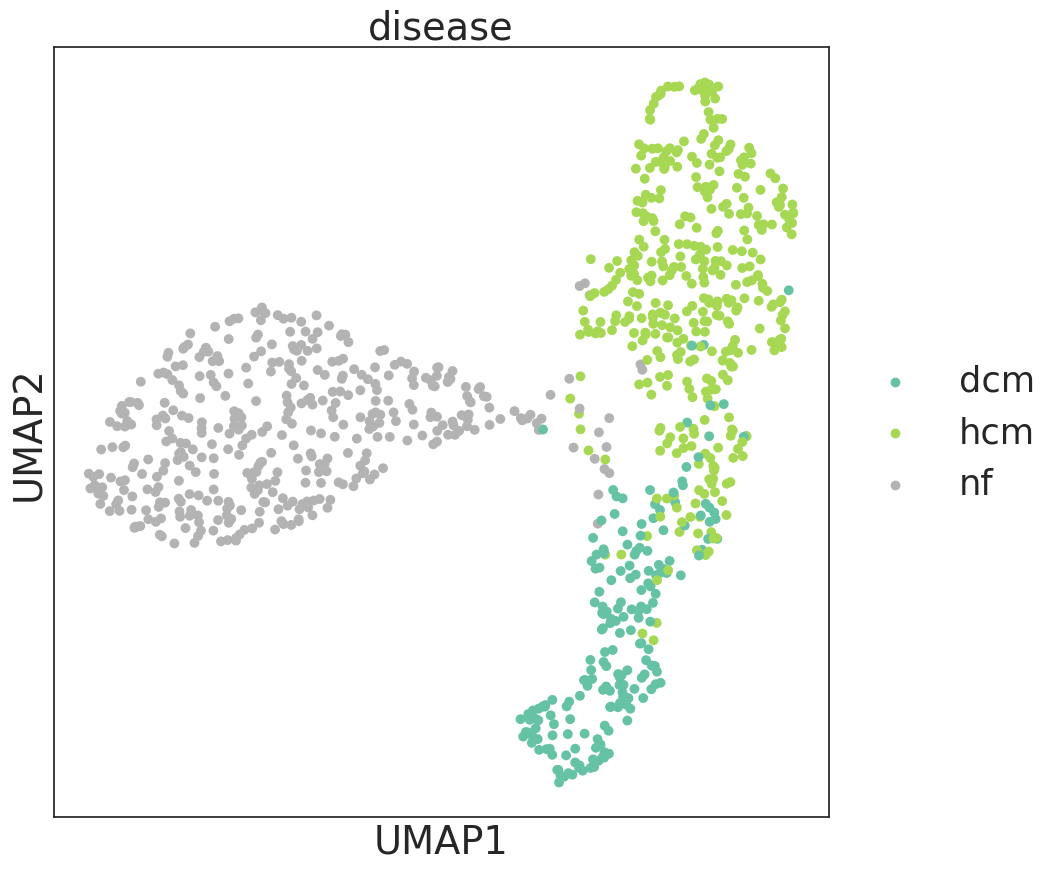

In [4]:
# plot UMAP of cell embeddings
# note: scanpy umap necessarily saves figs to figures directory
embex.plot_embs(embs=embs, 
                plot_style="umap",
                output_directory="path/to/output_directory/",  
                output_prefix="emb_plot")

<Figure size 2250x2250 with 0 Axes>

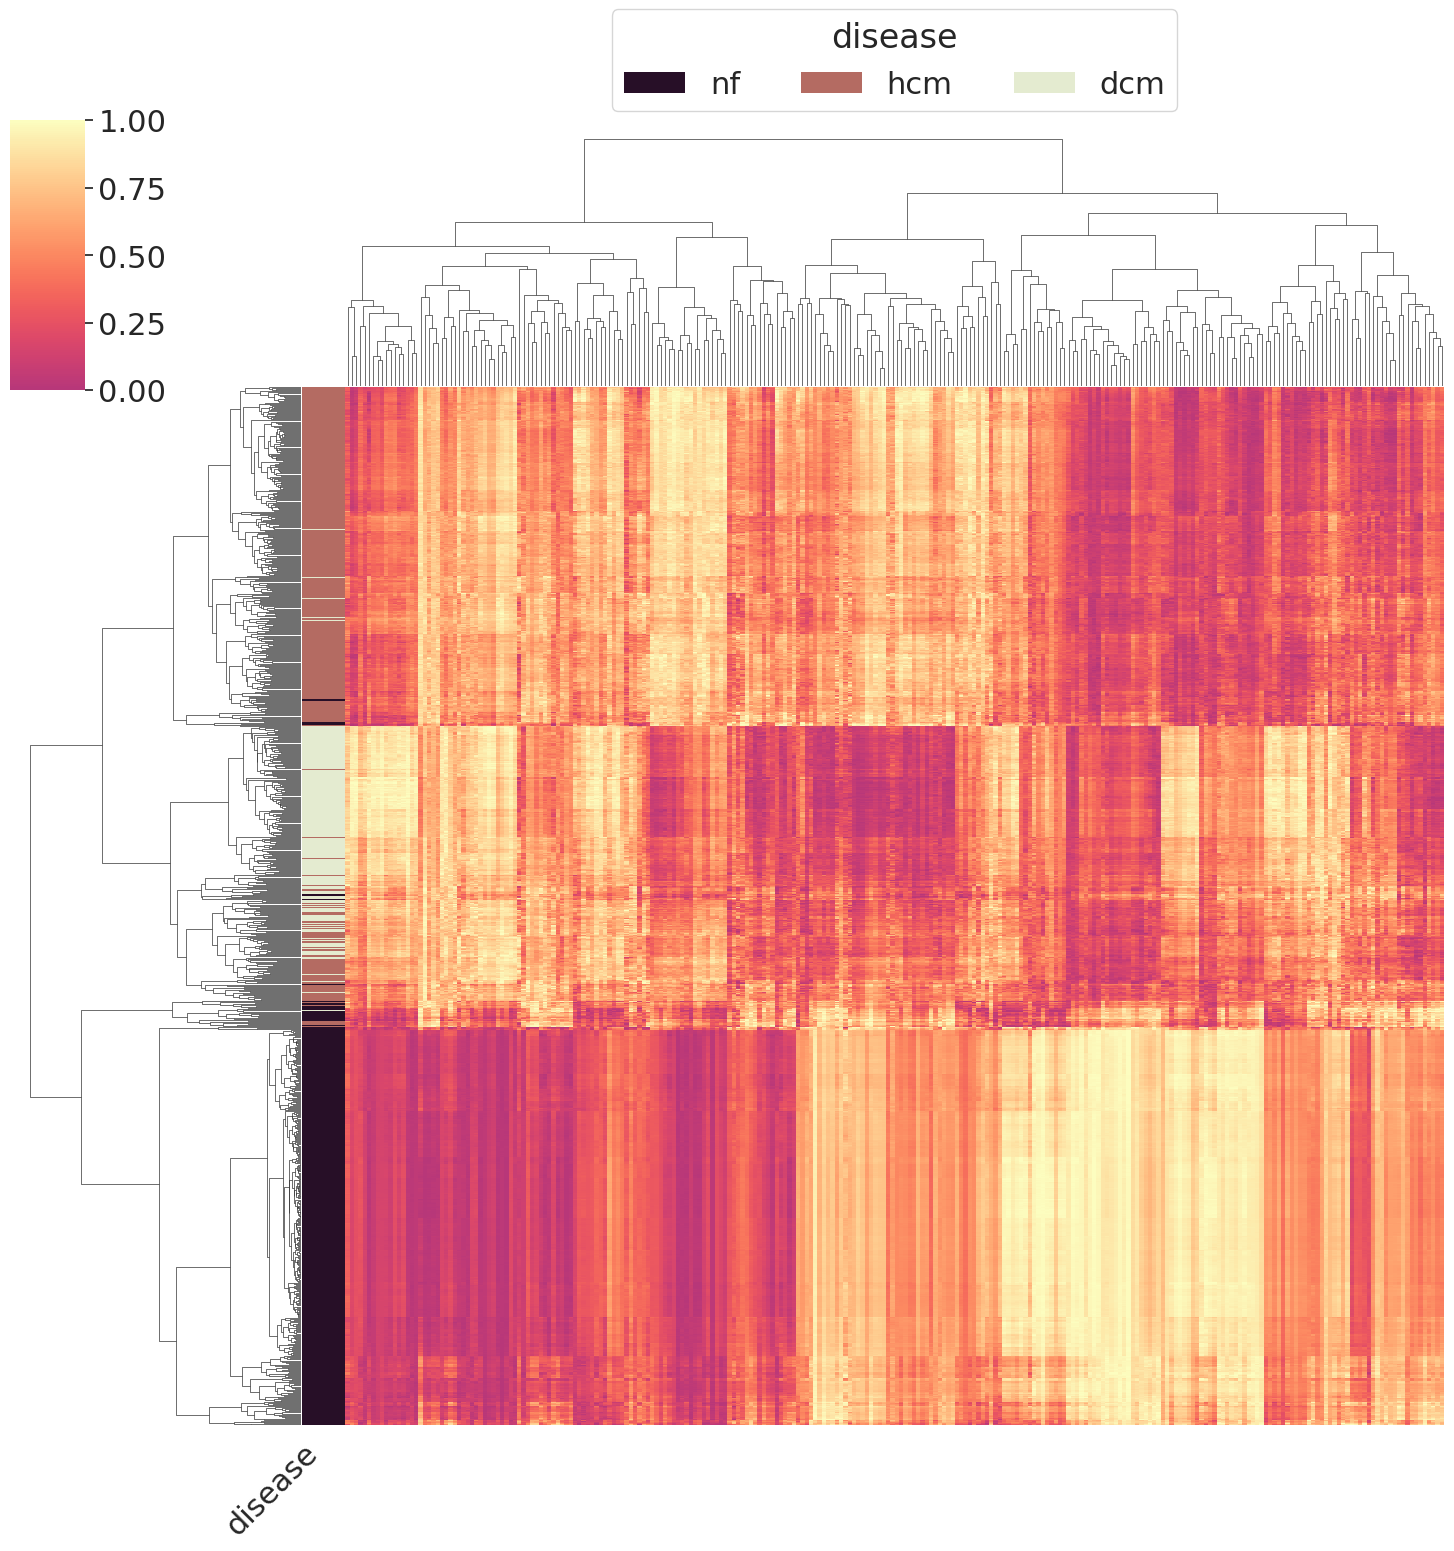

In [5]:
# plot heatmap of cell embeddings
embex.plot_embs(embs=embs, 
                plot_style="heatmap",
                output_directory="path/to/output_directory/",
                output_prefix="emb_plot")